<a href="https://colab.research.google.com/github/JoaquinJustelP/Python_UB_2024/blob/main/Resumen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Paso 1: Importar bibliotecas**
Comencemos importando las bibliotecas necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Paso 2: Cargar datos**

Vamos a descargar y cargar un conjunto de datos de enfermedades cardíacas desde una URL pública.

In [2]:
# URL del conjunto de datos de enfermedades cardíacas (ejemplo)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'


# Nombre de las columnas del conjunto de datos
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Cargar datos desde la URL en un DataFrame
data = pd.read_csv(url, names=column_names, na_values='?')

# Mostrar las primeras filas del DataFrame y resumen estadístico
print("Datos originales:")
print(data.head())
print("\nResumen estadístico:")
print(data.describe())

Datos originales:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Resumen estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356

# **Paso 3: Manipulación y limpieza de datos**

Realizaremos algunas manipulaciones y limpieza básicas en el conjunto de datos.

In [3]:
# Verificar y manejar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [4]:
# Llenar valores nulos con la mediana de cada columna
data.fillna(data.median(), inplace=True)

In [5]:
# Convertir la columna 'sex' a valores categóricos
data['sex'] = data['sex'].replace({0: 'female', 1: 'male'})

In [6]:
# Mostrar DataFrame después de la limpieza
print("\nDatos después de la limpieza:")
print(data.head())


Datos después de la limpieza:
    age     sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    male  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0    male  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0    male  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0    male  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  female  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


# **Paso 4: Visualización de datos**

Ahora vamos a explorar los datos mediante visualizaciones informativas.

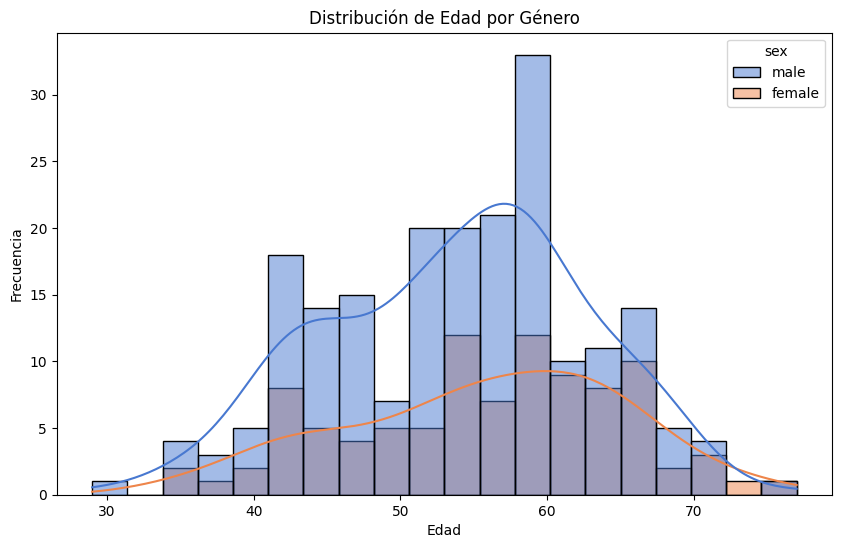

In [7]:
# Visualización: Histograma de Edad por Género
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='sex', bins=20, kde=True, palette='muted')
plt.title('Distribución de Edad por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

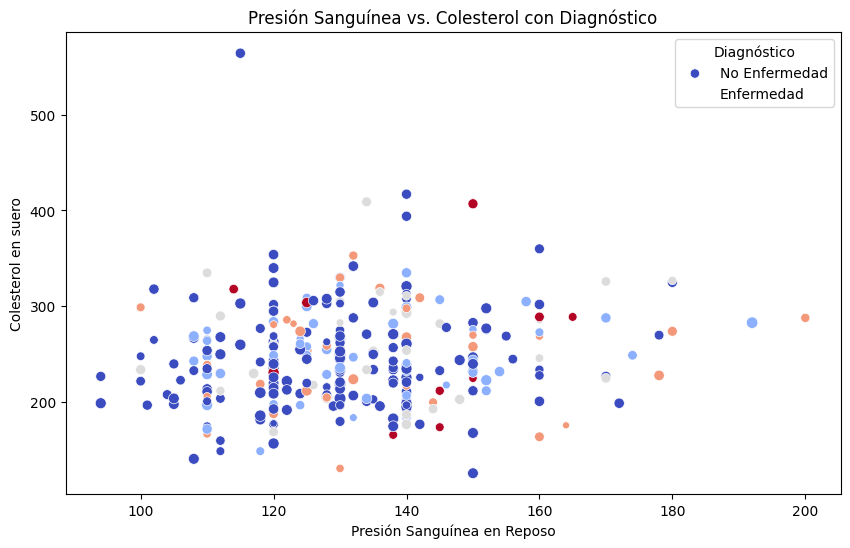

In [8]:
# Visualización: Diagrama de dispersión de Presión Sanguínea vs. Colesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='trestbps', y='chol', hue='target', palette='coolwarm', size='thalach')
plt.title('Presión Sanguínea vs. Colesterol con Diagnóstico')
plt.xlabel('Presión Sanguínea en Reposo')
plt.ylabel('Colesterol en suero')
plt.legend(title='Diagnóstico', labels=['No Enfermedad', 'Enfermedad'])
plt.show()

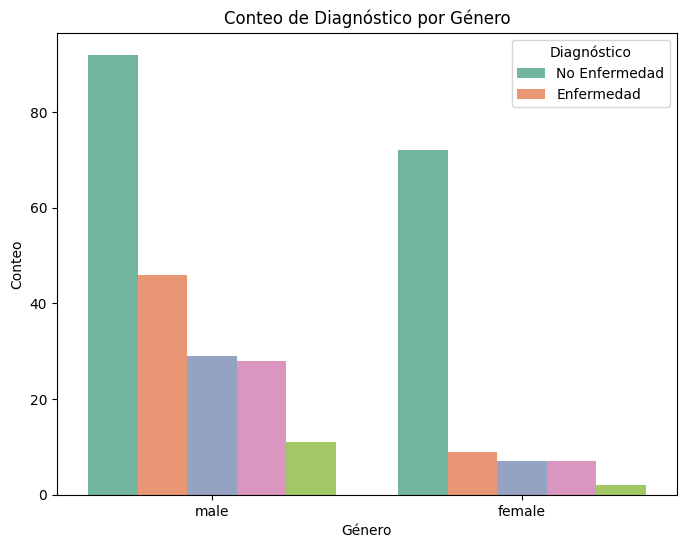

In [9]:
# Visualización: Gráfico de barras de Diagnóstico por Sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', hue='target', palette='Set2')
plt.title('Conteo de Diagnóstico por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.legend(title='Diagnóstico', labels=['No Enfermedad', 'Enfermedad'])
plt.show()

<Figure size 1200x1000 with 0 Axes>

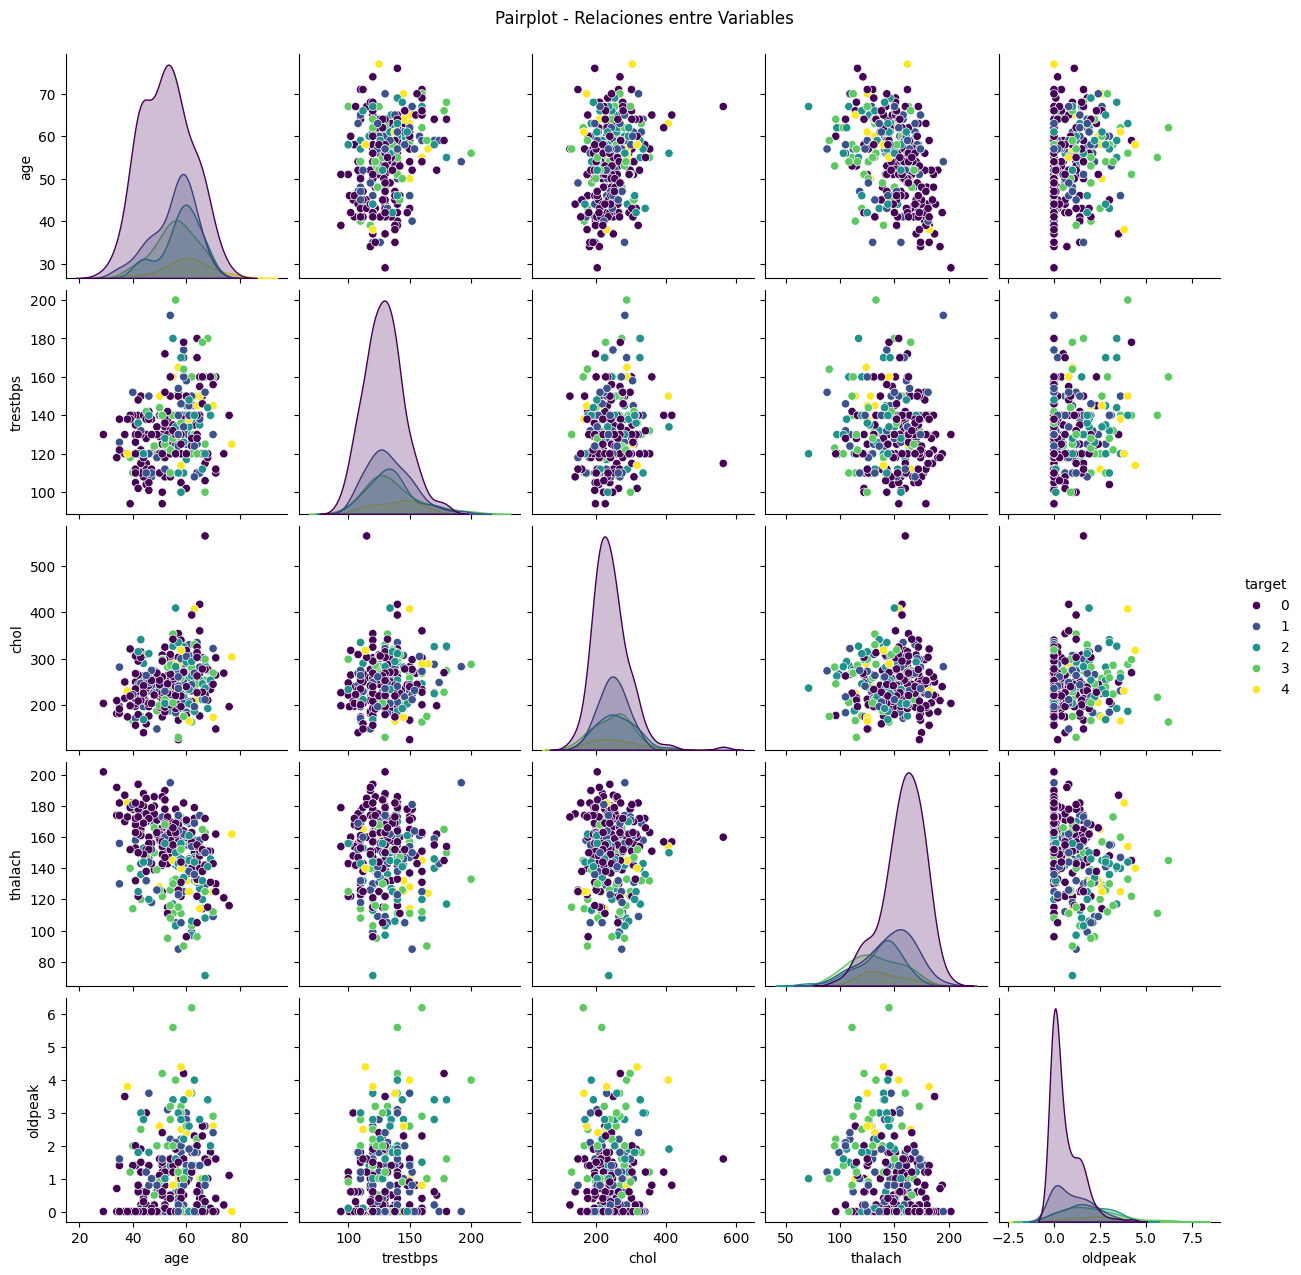

In [10]:
# Visualización: Pairplot para analizar relaciones entre variables
plt.figure(figsize=(12, 10))
sns.pairplot(data=data, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target', palette='viridis')
plt.suptitle('Pairplot - Relaciones entre Variables', y=1.02)
plt.show()
